<a href="https://colab.research.google.com/github/linyu2703/claims-analysis/blob/main/claims_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading CSV files**

In [3]:
df_header = pd.read_csv('STONYBRK_20240531_HEADER.csv')
df_line = pd.read_csv('STONYBRK_20240531_LINE.csv')
df_code = pd.read_csv('STONYBRK_20240531_CODE.csv')

**Exploring Files**

In [4]:
print(f"Shape: {df_header.shape}")
print(f"\nFirst 5 row:")
print(df_header.head(5))
print(f"\nColumn names and types:")
print(df_header.dtypes)
print(f"\nMissing values:")
print(df_header.isnull().sum())
print(f"\nDescriptive statistics:")
print(df_header.describe)

Shape: (388, 43)

First 5 row:
   ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2

In [5]:
print(f"Shape: {df_line.shape}")
print(f"\nFirst 5 rows:")
print(df_line.head(5))
print(f"\nColumn names and thpes")
print(df_line.dtypes)
print(f"\nMissing values:")
print(df_line.isnull().sum())
print(f"\nDescriptive statistics:")
print(df_line.describe)

Shape: (520, 28)

First 5 rows:
   ClientId  ProspectiveClaimId  LinePos  RevCode  HCPCS Modifier1 Modifier2  \
0        49            35216986        1      NaN  99291        GC        25   
1        49            35235657        1      NaN  99291        GC        25   
2        49            35244774        1      NaN  99291        GC        25   
3        49            35249003        1      NaN  99291        GC       NaN   
4        49            35249014        1      NaN  99291        GC       NaN   

   Modifier3  Modifier4            DxMapDelim  ...  PlaceOfService  NDC  \
0        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
1        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
2        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
3        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   
4        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   

   NDCUnits  NDCRx NDCUnitQualifier 

In [6]:
print(f"Shape: {df_code.shape}")
print(f"\nFirst 5 rows:")
print(df_code.head(5))
print(f"\nColumn names and thpes")
print(df_code.dtypes)
print(f"\nMissing values:")
print(df_code.isnull().sum())
print(f"\nDescriptive statistics:")
print(df_code.describe)

Shape: (1536, 9)

First 5 rows:
   ClientId  ProspectiveClaimId CodeQualifier  CodePos CodeValue  \
0        49            36752505           ABF        3     G93.6   
1        49            36819490           ABF        4     N17.9   
2        49            35352862           ABF        2     G06.1   
3        49            35244774           ABF       10     G90.8   
4        49            36745815           ABK        1   I77.819   

   CodeFromDate  CodeToDate  CodeAmnt  POAInd  
0           NaN         NaN       NaN     NaN  
1           NaN         NaN       NaN     NaN  
2           NaN         NaN       NaN     NaN  
3           NaN         NaN       NaN     NaN  
4           NaN         NaN       NaN     NaN  

Column names and thpes
ClientId                int64
ProspectiveClaimId      int64
CodeQualifier          object
CodePos                 int64
CodeValue              object
CodeFromDate          float64
CodeToDate            float64
CodeAmnt              float64
POAInd 

**Observation Documentation**

In [13]:
# 1. How many unique claims?
unique_claims = df_header['ProspectiveClaimId'].nunique()
print(f"Number of unique claims: {unique_claims}")

# 2. Date range of claims?
df_header['ServiceFromDate'] = pd.to_datetime(df_header['ServiceFromDate'])
df_header['ServiceToDate'] = pd.to_datetime(df_header['ServiceToDate'])
print(f"\nDate range of claims:")
print(f"Earliest service date: {df_header['ServiceFromDate'].min()}")
print(f"Latest service date: {df_header['ServiceToDate'].max()}")

# 3. Average service lines per claim?
average_lines = df_line.groupby('ProspectiveClaimId').size().mean()
print(f"\nAverage service lines per claim: {average_lines:.2f}")

# 4. Average diagnosis codes per claim?
average_codes = df_code.groupby('ProspectiveClaimId').size().mean()
print(f"\nAverage diagnosis codes per claim: {average_codes:.2f}")

Number of unique claims: 388

Date range of claims:
Earliest service date: 2023-09-25 00:00:00
Latest service date: 2024-05-29 00:00:00

Average service lines per claim: 1.34

Average diagnosis codes per claim: 3.96


**Question 1: Provider Analysis**

Top 5 billing providers by number of claims:
                          ProviderName  BillingProviderNPI  ClaimCount
5                        SB INTERNISTS          1821035601         152
0               SB SURGICAL ASSOCIATES          1063468536          81
2     NEW YORK SPINE AND BRAIN SURGERY          1154376309          69
4  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY          1538114723          40
3            SB PSYCHIATRIC ASSOCIATES          1437105905          36


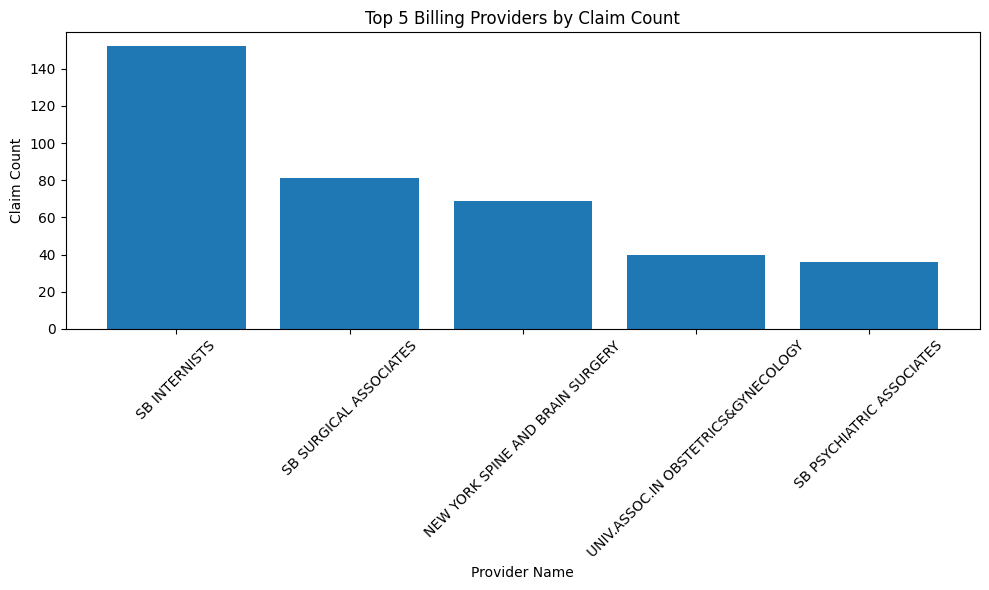

In [33]:
provider_info = df_header.groupby(['BillingProviderNPI', 'BillingProvFirstName']).size().reset_index(name='ClaimCount')
provider_info = provider_info.sort_values('ClaimCount', ascending=False).head(5)
provider_info['ProviderName'] = provider_info['BillingProvFirstName']

# Top 5
print(f"Top 5 billing providers by number of claims:")
print(provider_info[['ProviderName', 'BillingProviderNPI', 'ClaimCount']])

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(provider_info['ProviderName'], provider_info['ClaimCount'])
plt.xlabel('Provider Name')
plt.ylabel('Claim Count')
plt.title('Top 5 Billing Providers by Claim Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Question 2: Payer Mix Analysis**

Top 5 primary payers by claim volume:
PrimaryPayerName
MEDICARE                      242
HEALTHFIRST FFS                46
FIDELIS/BETTER HEALTH PLAN     26
HIP MEDICAID                   17
HEALTHFIRST CAPITATED          10
Name: count, dtype: int64

Percentage of total claims for each payer:
             PrimaryPayerName  ClaimCount  Percentage
0                    MEDICARE         242       62.37
1             HEALTHFIRST FFS          46       11.86
2  FIDELIS/BETTER HEALTH PLAN          26        6.70
3                HIP MEDICAID          17        4.38
4       HEALTHFIRST CAPITATED          10        2.58


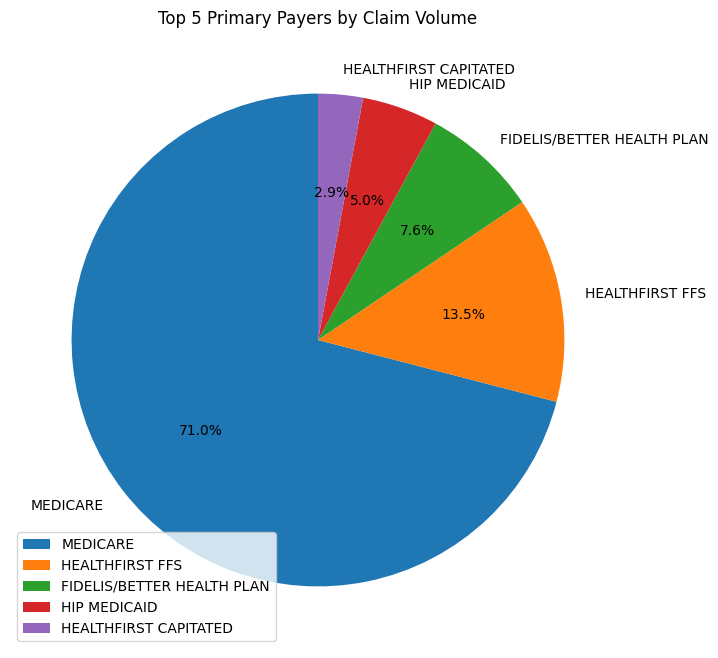

In [47]:
# Top 5
payer_volume = df_header['PrimaryPayerName'].value_counts().head(5)
print(f"Top 5 primary payers by claim volume:")
print(payer_volume)

# Percentage calculation claims by volume
total_claims = len(df_header)
payer_percentages = (payer_volume / total_claims * 100).round(2)

# Dataframe to group info
payer_df = pd.DataFrame({
    'PrimaryPayerName': payer_volume.index,
    'ClaimCount': payer_volume.values,
    'Percentage': payer_percentages.values
})
print(f"\nPercentage of total claims for each payer:")
print(payer_df)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(payer_df['Percentage'],
        labels=payer_df['PrimaryPayerName'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Top 5 Primary Payers by Claim Volume')
plt.legend()
plt.show()

**Question 3: Common Diagnoses**

In [50]:
# Top 10 diagnosis codes
top_diag = df_code['CodeValue'].value_counts().head(10)

# Create dataframe to display the data
df_diag = pd.DataFrame({
    'ICD-10 code': top_diag.index,
    'Frequency': top_diag.values
})

print(f"Top 10 diagnosis ICD-10 codes:")
print(df_diag)

Top 10 diagnosis ICD-10 codes:
  ICD-10 code  Frequency
0      J96.01         62
1         I10         49
2       E78.5         49
3       G93.5         34
4       D64.9         29
5      I25.10         27
6       I61.9         26
7      I48.91         24
8       I60.8         24
9       I50.9         22


**Question 4: Common Procedures**

Top 10 frequently billed HCPCS procedures codes:
   HCPCS                                ClientProcedureName  Frequency
0  99291                  CRITICAL CARE, INITIAL FIRST HOUR         68
1  99233  SUBSEQUENT HOSP. CARE,PER DAY,FOR THE E&M OF A...         48
2  99233  SUBSEQ.HOSP.CARE DETAILED INTERVAL HX.,EXAM HI...         48
3  99233  SUBSEQ. HOSP CARE DETAILED INTERVAL HX,EX,HIGH...         48
4  99213  OFFICE/OUTPATIENT VISIT,ESTABL.PT,EXPANDED HX,...         39
5  99213  OFFICE OR OUTPATIENT VISIT,ESTAB. PATIENT,EXPA...         39
6  99213  OFFICE/OUTPATIENT VISIT FOR  E&M OF ESTAB PATI...         39
7  99213  OFFICE OR OUTPAT.  VISIT  ESTABLISHED PAT.,EXP...         39
8  99223  INITIAL  HOSPITAL CARE PER DAY,FOR THE E&M OF ...         33
9  99223  INITIAL HOSP. CARE,COMPREHENSIVE HX,EX,HIGH CO...         33


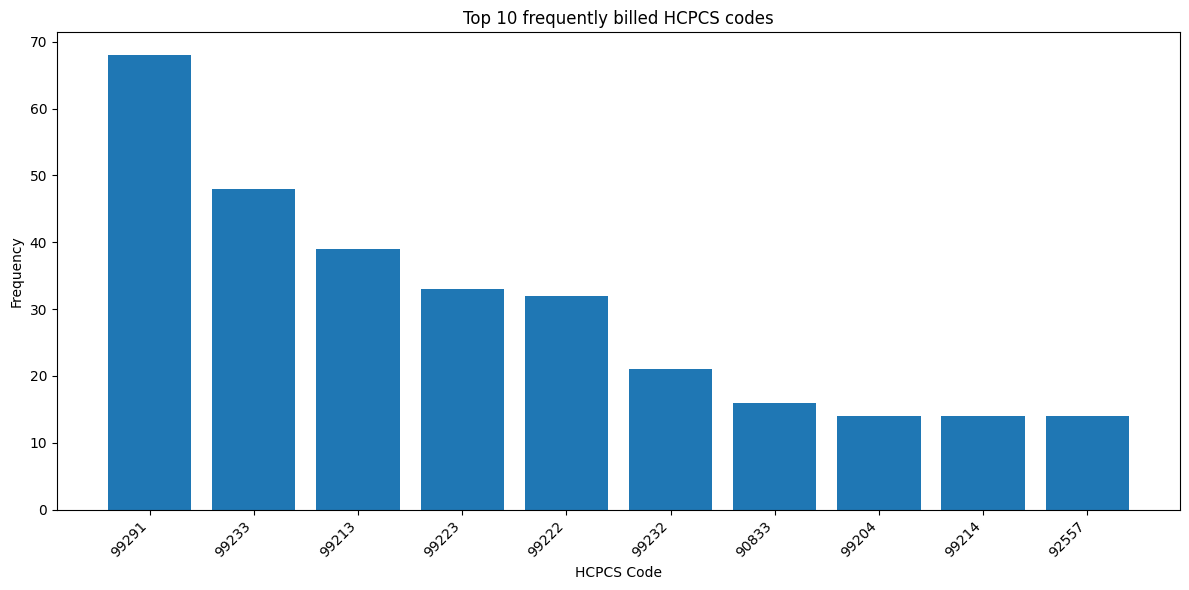

In [54]:
top_hcpcs = df_line['HCPCS'].value_counts().head(10)

df_hcpcs = pd.DataFrame({
    'HCPCS': top_hcpcs.index,
    'Frequency': top_hcpcs.values
})

# Removing potential duplicates
hcpcs_cleaned = df_line[['HCPCS','ClientProcedureName']].drop_duplicates()

# Merging and displaying HCPCS code, description, and frequency
df_hcpcs = df_hcpcs.merge(hcpcs_cleaned, on='HCPCS', how='left')
df_hcpcs = df_hcpcs[['HCPCS', 'ClientProcedureName', 'Frequency']]

print(f"Top 10 frequently billed HCPCS procedures codes:")
print(df_hcpcs.head(10))

# Bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_hcpcs['HCPCS'], df_hcpcs['Frequency'])
plt.xlabel('HCPCS Code')
plt.ylabel('Frequency')
plt.title('Top 10 frequently billed HCPCS codes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Question 5: Service Location Analysis**

In [72]:
place_counts = df_header['PlaceOfService'].value_counts().reset_index()
place_counts.columns = ['PlaceOfService', 'ClaimCount']

# Calculating percentage of claims by each place of services
total_claims = len(df_header)
place_counts['Percentage'] = (place_counts['ClaimCount'] / total_claims * 100).round(2)

print("Claims submitted for each place of service with percentage:")
print(place_counts)


filtered_facility = df_header[df_header['Facility_Location'].isin(['INPATIENT', "DOCTOR'S OFFICE"])]
facility_counts = filtered_facility['Facility_Location'].value_counts().reset_index()
facility_counts.columns = ['Facility_Location', 'ClaimCount']
facility_counts['Percentage'] = (facility_counts['ClaimCount'] / total_claims * 100).round(2)

print("\nClaims submitted by facility location with percentage:")
print(facility_counts)

Claims submitted for each place of service with percentage:
   PlaceOfService  ClaimCount  Percentage
0              21         231       59.54
1              11         132       34.02
2              22          24        6.19
3              23           1        0.26

Claims submitted by facility location with percentage:
  Facility_Location  ClaimCount  Percentage
0         INPATIENT         231       59.54
1   DOCTOR'S OFFICE         132       34.02


**Question 6: Claims with High Service Line Counts**

In [78]:
# Merging LINE and HEADER csv
merged_data = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')
lines_per_claim = merged_data.groupby('ProspectiveClaimId').size().reset_index(name='Number of lines')

print("\nService lines per claim:")
print(lines_per_claim)

# Claims with 5 or more service lines
high_svcline = lines_per_claim[lines_per_claim['Number of lines'] >= 5]
print(f"\nNumber of claims with 5 or more service lines: {len(high_svcline)}")

claim_charges = merged_data.groupby('ProspectiveClaimId').agg({
    'Charges': 'sum',
    'BillingProvFirstName': 'first'
}).reset_index()

claim_charges.columns = ['ProspectiveClaimId', 'Total Charges', 'Provider name']
high_line = high_svcline.merge(claim_charges, on='ProspectiveClaimId', how='left')

# Claim ID, Provider Name, Number of Lines, and Total Charges
print("\nClaims with 5 or more service lines:")
print(high_line[['ProspectiveClaimId', 'Provider name', 'Number of lines', 'Total Charges']])


Service lines per claim:
     ProspectiveClaimId  Number of lines
0              35216986                1
1              35235657                1
2              35244774                1
3              35249003                1
4              35249014                1
..                  ...              ...
383            36999799                3
384            37001070                4
385            37001295                3
386            37001309                3
387            37001489                2

[388 rows x 2 columns]

Number of claims with 5 or more service lines: 5

Claims with 5 or more service lines:
   ProspectiveClaimId                        Provider name  Number of lines  \
0            36668119  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                6   
1            36710175  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                5   
2            36740402  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                6   
3            36757684  UNIV.ASSOC.IN OBSTETRICS&GYNECO

**Question 7: Diagnosis-Procedure Combinations**

In [83]:
# Merging all csv files
header_line = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')
hl_code_merged = header_line.merge(df_code, on='ProspectiveClaimId', how='inner')

# Filtering for CPT Code 99291
cpt_99291 = hl_code_merged[hl_code_merged['HCPCS'] == '99291']

diag_count = cpt_99291['CodeValue'].value_counts().reset_index()
diag_count.columns = ['DiagnosisCode', 'Frequency']

# Top diagnosis code associated with CPT code 99291
top_diag = diag_count.iloc[0]
print(f"Most common diagnosis code: {top_diag['DiagnosisCode']}")

Most common diagnosis code: J96.01


**Question 8: Charges by Payer**

In [86]:
# Merging HEADER and LINE csv
head_line = df_header.merge(df_line, on='ProspectiveClaimId', how='inner')

# Total charges per claim
total_claim = header_line.groupby('ProspectiveClaimId').agg({
    'Charges': 'sum',
    'PrimaryPayerName': 'first'
}).reset_index()

total_claim.columns = ['Claim ID', 'Total charges', 'Payer name']
print("\nTotal charges pper claim (all line charges):")
print(total_claim)

# Grouping by Payer name
payer_stats = total_claim.groupby('Payer name').agg({
    'Total charges': 'sum',
    'Claim ID': 'count'
}).reset_index()

payer_stats.columns = ['Payer name', 'Total charges', 'Number of claims']

# Average charges calculation
payer_stats['Average charges'] = (payer_stats['Total charges'] / payer_stats['Number of claims']).round(2)

# Sorting total charges by descending
payer_stats = payer_stats.sort_values('Total charges', ascending=False)

print("\nTop 10 payers by total charges:")
print(payer_stats.head(10))


Total charges pper claim (all line charges):
     Claim ID  Total charges                          Payer name
0    35216986           1155                               AETNA
1    35235657           1155                               AETNA
2    35244774           1155                               AETNA
3    35249003           1155  UNITED COMMUNITY PLAN GOVT PROGRAM
4    35249014           1155                                MMIS
..        ...            ...                                 ...
383  36999799            855                            MEDICARE
384  37001070           1150                        HIP MEDICAID
385  37001295            211          FIDELIS/BETTER HEALTH PLAN
386  37001309            210                        HIP MEDICAID
387  37001489            105          FIDELIS/BETTER HEALTH PLAN

[388 rows x 3 columns]

Top 10 payers by total charges:
                            Payer name  Total charges  Number of claims  \
17                            MEDICARE    